## Machine Learning: FORD Used Car Price Prediction

**Author:
<br> Md. Tariqul Islam
<br> B.Sc. Civil Engg. (KUET)**

In this notebook, we are working on part of a kaggle dataset containing used car information in the US for a total of 7 brands namely Audi, BMW, Skoda, Ford, Volkswagen, Toyota and Hyundai.
(*Dataset Source:* https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw)

<br>We will be developing a machine learning model from scratch based on the used car data for a particular brand, namely FORD, present in this dataset. The objective of the model will be to predict the price for a used car based on available features.

### Import Required Libraries

As mentioned above, we will be building a machine learning model based on our dataset. We might also create some visualizations to better understand what is happening with our data and our model. Hence we will require the following libraries to be imported into our notebook.
- `pandas` for data handling
- `LinearRegression` module from `sklearn.linear_model` for Linear Regression
- `train_test_split` module from `sklearn.model_selection` for splitting the dataset into train data and test data
- `mean_squared_error` from `sklearn.metrics` for error calculation
- `matplotlib.pyplot` and `seaborn` for data visualization

The following lines of codes will import the required libraries mentioned above.

In [164]:
# Import Libraries for Data handling
import pandas as pd

# Import Libraries for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Import the Dataset

The next step will be importing our data into the notebook. The filtered data from the original dataset, containing only the information on the FORD brand cars, are saved as a CSV file named `ford.csv`. We can use the `pandas.read_csv()` function to import this data in our notebook as a pandas dataframe object.

In [8]:
# Import data from a CSV file
df = pd.read_csv("ford.csv")

### Explore the Data

It is a good practice to explore the newly imported data and get familiar with every aspects of the dataset before diving into any data analysis operations. Spending a little extra time to understand the data in hand is always helpful in the long run for any data analysis related tasks.

The simplest way of getting a good look at our data is to display the dataframe using the `display()` comamand.

In [5]:
# Display the dataframe data
display(df.head(10))
# Display Dataframe shape
display(df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,61.4,1.0


(17964, 8)

We can see the first 10 rows of our dataset along with the shape of the dataframe at bottom stating that the dataset consists of 17964 rows  and 8 columns. That means our dataset for used ford cars contains a total of 17964 observations and 8 features for the observations.

Next we can display the dataframe information to get a summary of the features and their datatypes along with some other informations.

In [4]:
# Display Dataframe Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


We can see that among the 8 features contained in the dataset, 5 are in numerical formats and the other 3 are in string format. Also there are no missing values in any of the features in this dataframe, so no data cleaning operations are required.

### Explain the features

Now we can get familiarized with the features contained in this dataframe to get a better understanding of the dataset. The 8 features contained in the dataframe are:
- `model` : Name of the model of the car in observation
- `year` : The making year of the car in observation
- `price` : The resale price, in US Dollars, of the car in observation. **This will be the target variable for our Machine Learning Model.**
- `transmission` : The transmission system used in the car in observation
- `mileage` : Total number of miles run by the car at the time the study.
- `fuelType` : Type of fuel used by the car
- `mpg` : Number of miles output per galon of fuel
- `engineSize` : The volume of fuel and air that can be pushed through car's cylinders

Now that we have a better understanding of the features present in the dataset and identified our target variable, we can set out to develop our Machine Learning Model.

### Separating the features and target variable

The first step before building a machine learning model is to separate the feature and target variables. As we have seen above, the `price` variable in our dataset is the target variable and all the other seven variables are our feature variables.
<br>We will have to create two different dataframes containing our feature variables and our target variable separately.

For the purpose of building our initial model, we will separate only the numeric variables from our dataset as feature variables and store them in a dataset named `X`, and the `price` variable as our target variable and store it in a dataset named `Y`.

We will first create two lists named `features` and `target` containing only the column names of our feature and target variables and use those lists to extract the desired data columns from our dataframe and store in new ones.

In [13]:
# Create feature and target lists
features = ['mileage', 'year', 'mpg', 'engineSize']
target = ['price']

# Create feature and target dataframes
X = df[features]
y = df[target]

# display the dataframe shapes
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (17964, 4)
Shape of y:  (17964, 1)


### Split the Data into Train Set and Test Set

The next step for building a ML model is to split the available data into training and test set. This basic concept is to use part of the available data for training the model and, after training, to use the rest of the data to test the trained model accuracy.
<br>Usually the train set consists of 80% of the available data, and the test set consists of the rest 20% data. The splitting or sampling is done randomly so as to diversify the observations present in either the test set or the train set.

The splitting is done by using the `train_test_split()` function from `SciKit Learn`. A `random_state` value is provided to the function along with other arguments so that the randomization is fixed and the whole splitting process can be recreated later for comparison purposes. We will be providing `random_state = 47` as the function argument.

In [14]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

# Display Split Data shapes
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (14371, 4)
y_train shape:  (14371, 1)
X_test shape:  (3593, 4)
y_test shape:  (3593, 1)


#### Perform Linear Regression

Now we will create a linear regression model based on the train set data to predict the price of used FORD cars.

To achieve this goal, we will first need to create an instance of the `LinearRegression()` model in our environment, and then fit our training data in that model.

In [15]:
# Create a model instance
model = LinearRegression()

# Fit data to model
model = model.fit(X_train, y_train)

#### Predict Price from the test set

Now it's time to see if our model is accurate enough to predict the price of used cars. For this purpose, we will use our test features and predict the target variable using our fitted model. The predicted prices will be stored inside a new dataframe.

In [16]:
# Predict from the test set features
y_pred = model.predict(X_test)

#### Visualize difference between original and predicted prices

Now let's first visualize the difference in our predicted values and the original values of the target variable using a line chart. This will give as a qualitative representation of our model's accuracy.

For visualization purpose, we will first create a new dataframe named `df_compare` containing only the original and predicted prices and rename the columns as `Original_Price` and `Predicted_Price`. As we know that our predicted and test datasets contain thousands of observation, we will be taking only a portion of the `df_compare` dataset for our visualization.

We will use the `dataframe.sample()` method to extract a randomized fraction of our dataset and store it in a new dataframe named `df_visualization`. We will then reset the index of our visualization dataframe for avoiding unwanted issues in our visualizations.
<br>We will be creating two individual line plotsand use a SeaBorn lineplot to visualize the differences between the original and predicted prices in the sampled data.
<br>The following lines of codes will complete this objective.

In [104]:
# Create a Blank Dataframe
df_compare = pd.DataFrame()

# Insert dataframe columns
df_compare["Original_Price"] = y_test['price']
df_compare["Predicted_Price"] = y_pred



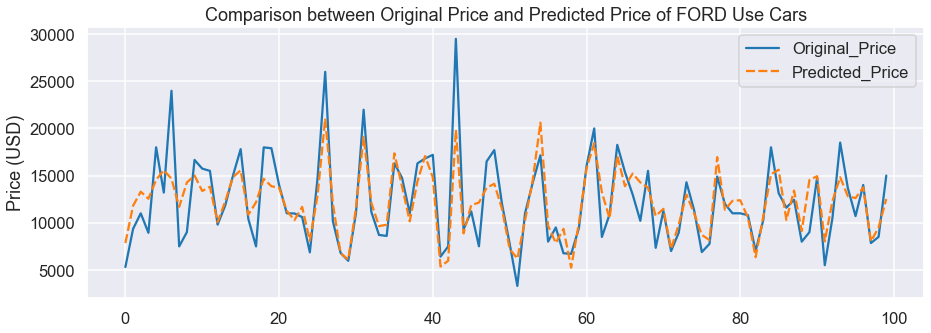

In [177]:
# Create sampled dataset for visualization
df_visualization = df_compare.sample(n = 100, random_state = 47)

# Reset index of new dataframe
df_visualization = df_visualization.reset_index(drop = True)

# Create LinePlot Visualization
sns.set_context("talk")
sns.set_style("darkgrid")

plt.figure(figsize = (15,5))
sns.lineplot(data = df_visualization)
plt.title("Comparison between Original Price and Predicted Price of FORD Use Cars")
plt.ylabel("Price (USD)")
# plt.xticks(ticks=[])
# plt.axhline()
# plt.axvline()
plt.show()

#### Find the RMSE value

We have already seen a visual representation of the prediction errors in parts of the test data. We can also use different mathematical metrics to measure the level of errors in our model's prediction values.

As an example of error metrics, we will calculate the Root Mean Squared Error (RMSE) value to qualify the level of error in our prediction.

In [163]:
# Evaluat RMSE value
RMSE = mean_squared_error(y_test, y_pred, squared = False)
print("RMSE: ", RMSE)

RMSE:  2497.825940416747


We can see that the RMSE value in each of our prediction is about 2500 USD, which is way too much unacceptable. So we must further develop our model to minimize the errors in the predicted values.